In [2]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, partial_trace
from qiskit.synthesis import TwoQubitWeylDecomposition
from qiskit.circuit.library import UnitaryGate
from qiskit.visualization import circuit_drawer
import sympy
from IPython.display import Math
import pandas as pd

In [3]:
from QuditsOnQubits import QuditsOnQubits

In [3]:
Fgate = QuditsOnQubits().circuit[2]

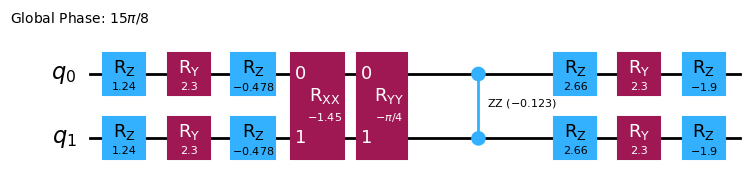

In [4]:
Fgate.draw('mpl')

In [5]:
Statevector(Fgate).draw('latex')

<IPython.core.display.Latex object>

In [3]:
def prtMTX(matrix):
    return Math(sympy.latex(sympy.Matrix(matrix)))

In [7]:
def C3_adder():
    circ = QuantumCircuit(4)

    circ.cx(1,2)
    circ.ccx(1,2,3)
    circ.ccx(1,3,2)
    circ.cx(0,3)
    circ.ccx(0,3,2)
    circ.ccx(0,2,3)
    circ.cz(1,2)
    circ.cz(0,3)

    circ.name = "C3"
    return circ

In [8]:
C3 = C3_adder()

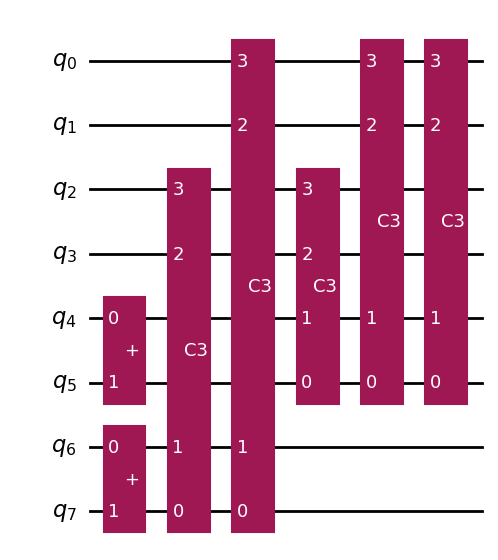

In [9]:
ame43circ = QuantumCircuit(8)
ame43circ.append(Fgate, [4,5])
ame43circ.append(Fgate, [6,7])
ame43circ.append(C3, [7, 6, 3, 2])
ame43circ.append(C3, [7, 6, 1, 0])
ame43circ.append(C3, [5, 4, 3, 2])
ame43circ.append(C3, [5, 4, 1, 0])
ame43circ.append(C3, [5, 4, 1, 0])

ame43circ.draw('mpl')

In [10]:
Statevector(ame43circ).draw('latex')

<IPython.core.display.Latex object>

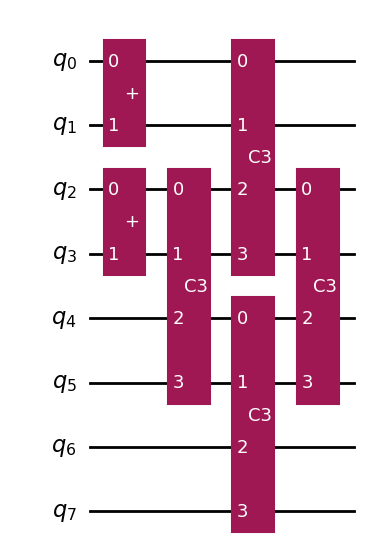

In [11]:
ame43circ_v2 = QuantumCircuit(8)
ame43circ_v2.append(Fgate, [0,1])
ame43circ_v2.append(Fgate, [2,3])
ame43circ_v2.append(C3, [2, 3, 4, 5])
ame43circ_v2.append(C3, [0, 1, 2, 3])
ame43circ_v2.append(C3, [4, 5, 6, 7])
ame43circ_v2.append(C3, [2, 3, 4, 5])
ame43circ_v2.draw('mpl')

In [12]:
Statevector(ame43circ_v2).draw('latex')

<IPython.core.display.Latex object>

In [13]:
len(Statevector(ame43circ_v2))

256

In [14]:
from qiskit.quantum_info import partial_trace

In [15]:
qubit0 = np.array([[1], [0]])
qubit1 = np.array([[0], [1]])

Qtrt0 = np.kron(qubit0, qubit0)
Qtrt1 = np.kron(qubit0, qubit1)
Qtrt2 = np.kron(qubit1, qubit0)

In [16]:
pt1 = partial_trace(Statevector(ame43circ_v2), [2,3,1,0])

In [17]:
pt1.draw('latex')

<IPython.core.display.Latex object>

In [18]:
pt1.data.shape

(16, 16)

In [19]:
prtMTX(pt1.data)

<IPython.core.display.Math object>

In [11]:
ame43test = QuditsOnQubits().ame43circ

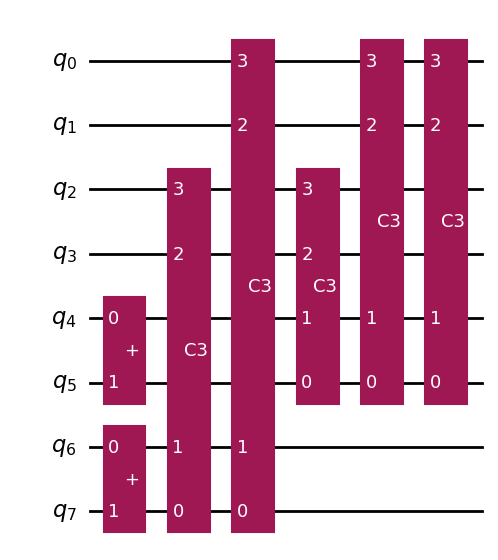

In [5]:
ame43test.draw('mpl')

In [6]:
Statevector(ame43test).draw('latex')

<IPython.core.display.Latex object>

In [17]:
partial_trace(Statevector(ame43test), [0,1,4,5]).data.round(5)

array([[ 0.11111+0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
         0.     +0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
         0.     +0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
        -0.     -0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j],
       [ 0.     +0.j,  0.11111-0.j,  0.     +0.j,  0.     +0.j,
         0.     +0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
         0.     +0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
         0.     +0.j, -0.     -0.j,  0.     +0.j,  0.     +0.j],
       [ 0.     +0.j,  0.     +0.j,  0.11111+0.j,  0.     +0.j,
         0.     +0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
         0.     +0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
         0.     +0.j,  0.     +0.j, -0.     -0.j,  0.     +0.j],
       [ 0.     +0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
         0.     +0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
         0.     +0.j,  0.     +0.j,  0.     +0.j,  0.     +0.j,
         0.     +0.j,  0.     +0.j,  

In [35]:
partial_trace(Statevector(ame43test), [0,1,4,5]).purity()

np.complex128(0.11111111111111122+1.335311428108488e-32j)

In [14]:
np.array([[0, 0, 0, 0],[2,2,2,2]])

array([[0, 0, 0, 0],
       [2, 2, 2, 2]])

In [4]:
ghz = QuditsOnQubits().circuit

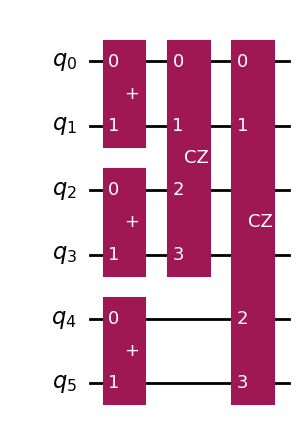

In [7]:
ghz[0].draw('mpl')

In [8]:
ghz[0]

In [9]:
from qiskit import qpy

In [10]:
with open('GHZ.qpy', 'wb') as fd:
    qpy.dump(ghz[0], fd)

In [12]:
with open('ame43.qpy', 'wb') as fd:
    qpy.dump(ame43test, fd)

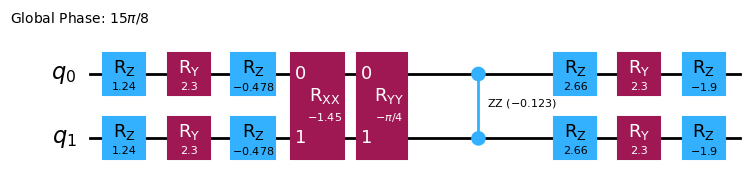

In [13]:
ghz[2].draw('mpl')

In [14]:
with open('Fgate.qpy', 'wb') as fd:
    qpy.dump(ghz[2], fd)